<a href="https://colab.research.google.com/github/Rafa516/Alan-Jones-article-code/blob/master/MiniProjeto_Wallmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução
> Walmart, Inc., é uma multinacional estadunidense de lojas de departamento.  
A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972.   
No ano de 2021, obteve um um lucro de $13.51 Bilhões.  
Sendo uma das principais lojas de varejo do mundo, os dados contemplam as vendas semanais de 45 lojas espalhadas pelos Estados Unidos.   
O Walmart realiza vários eventos promocionais de descontos ao longo do ano. 
Essas remarcações precedem feriados importantes, os quatro maiores de todos, que são o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o Natal. 
As semanas que incluem esses feriados têm um peso maior.


# 1.0 A questão do negócio


#2.0 Entendimento do negócio

# 3.0 Coleta de dados 

## Descrição dos dados

###Feriados
> **Super Bowl**: 12-Feb-10, 11-Feb-11, 10-Feb-12    
**Labour Day**: 10-Sep-10, 09-Sep-11, 07-Sep-12  
**Thanksgiving**:26-Nov-10, 25-Nov-11, 23-Nov-1  
**Christmas**:31-Dec-10, 30-Dec-11, 28-Dec-12

###Variáveis
> **Store**: Número da Loja  
**Date**:Semana de Venda  
**Weekly_Sales**:Venda Naquela Semana    
**Holiday_Flag**:Flag se é ou não semana com feriado (1 - Holiday Week 0 - Non-Holiday Week)  
**Temperature**:Temperatura do dia em °F  
**Fuel_Price**:Preço do combustível na região da loja  
**CPI**:Índice de preços ao consumidor  
**Unemployment**:Taxa de desemprego


 













 







## Importação das bibliotecas usadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

##Tranformando o arquivo CSV em um dataframe para melhor vizualização das colunas

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Rafa516/Wallmart-Inc/master/Walmart.csv', parse_dates=['Date'],decimal='.')
df.head(200)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
195,2,2011-04-02,1929346.23,0,38.25,2.989,212.224065,8.028
196,2,2011-11-02,2168041.61,1,33.19,3.022,212.592862,8.028
197,2,2011-02-18,2080884.82,0,57.83,3.045,212.903312,8.028
198,2,2011-02-25,1833511.08,0,60.80,3.065,213.190421,8.028


In [3]:
#Conferindo o Tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


## Verificando qual o preço médio de venda semanal

In [4]:
media_semanal = df['Weekly_Sales'].mean().round(2)
print("Média de venda semanal: ", media_semanal)


Média de venda semanal:  1046964.88


##Verificando a correlação das variáveis

In [5]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


##Verificando no gráfico as correlações

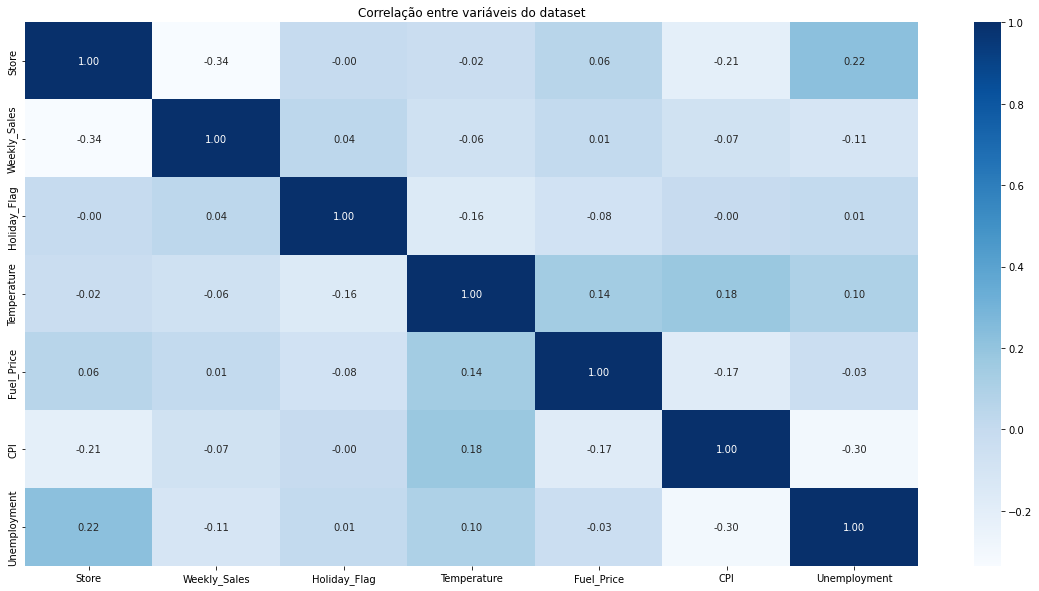

In [6]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

##verificação de qual atributo com maior e menor correlação com a venda



## Verificação da média de vendas semanais por cada loja



In [24]:
means  = df[['Store','Weekly_Sales']].groupby('Store').mean()
means.reset_index(inplace = True)
means.rename(columns = {'Weekly_Sales':'Mean_Sales'}, inplace = True )
media_semanal = pd.merge(df, means, how = 'left', on = 'Store')
media_semanal[['Store','Date','Mean_Sales']]


,Store,Date,Mean_Sales
0,1,2010-05-02,1.555264e+06
1,1,2010-12-02,1.555264e+06
2,1,2010-02-19,1.555264e+06
3,1,2010-02-26,1.555264e+06
4,1,2010-05-03,1.555264e+06
...,...,...,...
6430,45,2012-09-28,7.859814e+05
6431,45,2012-05-10,7.859814e+05
6432,45,2012-12-10,7.859814e+05
6433,45,2012-10-19,7.859814e+05
